### K-Nearest Neighbor(KNN)

- its a supervised ML algorithm, Can be used for Regression & Classification but mostly it is used for the Classification problems. 
- Non-parametric means that there is no assumption for the underlying data distribution
- it categorizes a new data into the category that is most similar to the available categories
- KNN  stores all the available data and classifies a new data based on the similarity.
- KNN is a lazy learner algorithm, It means it takes less time in training and takes more time for prediction.

The module, **sklearn.neighbors** that implements the k-nearest neighbors algorithm, provides the functionality for **unsupervised** as well as **supervised neighbors**-based learning methods

The unsupervised nearest neighbors implement different algorithms (BallTree, KDTree or Brute Force) to find the nearest neighbor(s) for each sample.

#### Why do we need a K-NN Algorithm?

 we need knn algorithm To identify the category or class of a datapoint, based on avaiable dataset

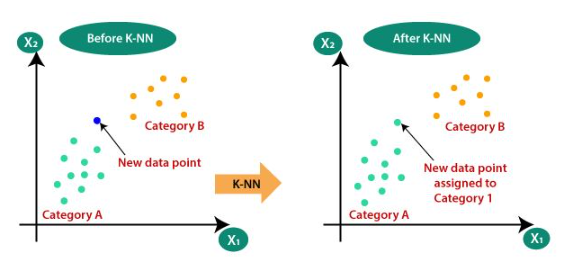

#### How does K-NN work? Describe the steps involve in KNN Algorithm?

    Step-1: Select K numbers of neighbors around the new point
    Step-2: Calculate the Euclidean distance of K neighbors 
    Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
    Step-4: Count the number of the data points in each category, for each neighbors
    Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
    Step-6: Our model is ready.

In [1]:
# Consider the below figure and we have to classify the new datapoints

<img src='knn1.jpg'>

Firstly, we will choose the number of neighbors, so we will choose the k=5.
Next, we will calculate the Euclidean distance between the data points.

<img src='euclidian-distance2.jpg'>

                                        Image Source:javatpoint.com    

By calculating the Euclidean distance we got the nearest neighbors, as three nearest neighbors in category A and two nearest neighbors in category B. 

<img src='knn2.jpg'>

                                        Image Source:javatpoint.com 

### How to select the value of K neighbors in the K-NN Algorithm?

- There is no particular way to determine the best value for "K", we start by taking some random values of K. The most preferred value for K is 5.
- A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
    Large values for K are good, but it may find some difficulties.

- A low value of K causes a highly complex model as well, which might result in over-fitting
    of the model.
- It means the prediction process is not generalized enough to be used for out-of-sample cases.
- Out-of-sample data is the data that is outside of the dataset used to train the model.

Now, on the opposite side of the spectrum, if we choose a very high value of K, such
as K=20, then the model becomes overly generalized

#### Advanctages of KNN

- robust to the noisy training data
- more effective if the training data is large.

### Disvantages of KNN

- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.

### Python implementation of the KNN

In [7]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd  

In [8]:
import seaborn as sns

In [4]:
df=sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [7]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [9]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [11]:
df.species=le.fit_transform(df['species'])

In [13]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [14]:
y[0:3]

array(['setosa', 'setosa', 'setosa'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier  

In [17]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 

# here p is power of distance metric of minikowski
# When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 
# For arbitrary p, minkowski_distance (l_p) is used.'''

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred= knn.predict(X_test)  

In [20]:
from sklearn.metrics import accuracy_score, r2_score,f1_score,precision_score,recall_score,roc_auc_score
print('accuracy score: ',accuracy_score(y_test,y_pred))
# print('r2 score: ',r2_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred,average='weighted'))
print('precision score: ',precision_score(y_test,y_pred,average='micro'))
# print('recall score: ',recall_score(y_test,y_pred))

accuracy score:  1.0
f1_score:  1.0
precision score:  1.0


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [22]:
knn.score(X_train,y_train)

0.9583333333333334

In [23]:
knn.score(X_test,y_test)

1.0

### Some Question Regarding KNN Algorithm??

In [26]:
# What is mean by "knn is a non-parametric algorithm"?

it doesn’t assume anything about the underlying data

### Pros and Cons of knn

PROS:
- simple to understand and interpret
- very useful for nonlinear data because there is no assumption about data in this algorithm
- versatile algorithm: can use for classification as well as regression
- It has relatively high accuracy but there are much better supervised learning models than KNN

CONS:
- It is computationally a bit expensive algorithm because it stores all the training data
- High memory storage required as compared to other supervised learning algorithms
- Prediction is slow in case of big N
- It is very sensitive to the scale of data as well as irrelevant features

In [3]:
knn=KNeighborsClassifier(n_neighbors=5,
                        weights='uniform',
                        algorithm='auto',
                        leaf_size=30,
                        p=2,
                        metric='minkowski',
                        metric_params=None,
                        n_jobs=None,)

**Parameters**

    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'} or callable, default='uniform'
        weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape containing the weights.
          
              
    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        Algorithm used to compute the nearest neighbors:

        - 'ball_tree' will use :class:`BallTree`
        - 'kd_tree' will use :class:`KDTree`
        - 'brute' will use a brute-force search.
        - 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.

        Note: fitting on sparse input will override the setting of this parameter, using brute force.

    leaf_size : int, default=30
    Leaf size passed to BallTree or KDTree.  This can affect the speed of the construction and query, as well as the memory
    required to store the tree.  The optimal value depends on the nature of the problem.
        
    p : int, default=2
        Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 
        and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
        
    metric : str or callable, default='minkowski'
    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of :class:`DistanceMetric` for a
    list of available metrics.
    If metric is "precomputed", X is assumed to be a distance matrix and
    must be square during fit. X may be a :term:`sparse graph`,
    in which case only "nonzero" elements may be considered neighbors.

    metric_params : dict, default=None
        Additional keyword arguments for the metric function.

    n_jobs : int, default=None
        The number of parallel jobs to run for neighbors search.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
        Doesn't affect :meth:`fit` method.



**Attributes:**

    classes_ : array of shape (n_classes,)
        Class labels known to the classifier

    effective_metric_ : str or callble
        The distance metric used. It will be same as the `metric` parameter
        or a synonym of it, e.g. 'euclidean' if the `metric` parameter set to
        'minkowski' and `p` parameter set to 2.

    effective_metric_params_ : dict
        Additional keyword arguments for the metric function. For most metrics
        will be same with `metric_params` parameter, but may also contain the
        `p` parameter value if the `effective_metric_` attribute is set to
        'minkowski'.

    n_samples_fit_ : int
        Number of samples in the fitted data.

    outputs_2d_ : bool
        False when `y`'s shape is (n_samples, ) or (n_samples, 1) during fit
        otherwise True.


    >>> print(knn.predict([[1.1]]))
    [0]
    >>> print(knn.predict_proba([[0.9]]))
    [[0.66666667 0.33333333]]

### Unsupervised KNN:

The module, **sklearn.neighbors** that implements the k-nearest neighbors algorithm, provides the functionality for unsupervised as well as supervised neighbors-based learning methods.

**sklearn.neighbors.NearestNeighbors** is the module used to implement Unsupervised KNN

In [1]:
# Parameter & Description

    n_neighbors:
    The number of neighbors to get, default 5,int, optional
	
    radius:
    distance limit to find neighbors,default 1.0, float,optional 	
    
    algorithm:
    {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
    Algorithm to compute the nearest neighbors, If ‘auto’, it will decide the most appropriate algorithm based on the values       passed to fit method.
    
    leaf_size:
    It is passed to BallTree or KDTree, affect the speed of the construction & query, default 30.
    
    metric:
    metric to use to compute distance between points.
    We can choose from metric from scikit-learn or scipy.spatial.distance.
    Scikit-learn − [‘cosine’,’manhattan’,‘Euclidean’, ‘l1’,’l2’, ‘cityblock’]
    
    Scipy.spatial.distance- 
    [‘braycurtis’,‘canberra’,‘chebyshev’,‘dice’,‘hamming’,‘jaccard’,‘correlation’,‘kulsinski’,
    ‘mahalanobis’,‘minkowski’,‘rogerstanimoto’,‘russellrao’, ‘sokalmicheme’,'sokalsneath','seuclidean','sqeuclidean','yule']
    Default is minkowski>>
    
    P:
    Parameter for the Minkowski metric
    Default 2, which is equivalent to using Euclidean_distance(l2)
    
    N_jobs:
    numer of parallel jobs to run for neighbor search. The default value is None, int, optional

In [3]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

X = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 2], [2, 3], [3, 4],[4, 5]])
nn = NearestNeighbors(n_neighbors = 3, algorithm = 'ball_tree')
nn.fit(X)

# Now, find the K-neighbors of data set. It will return the indices and distances of the neighbors of each point.
distances, indices = nn.kneighbors(X)
indices

array([[0, 1, 3],
       [1, 2, 0],
       [2, 1, 0],
       [3, 4, 0],
       [4, 5, 3],
       [5, 6, 4],
       [6, 5, 4]], dtype=int64)

In [4]:
distances

array([[0.        , 1.41421356, 2.23606798],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 2.82842712],
       [0.        , 1.41421356, 2.23606798],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.41421356, 2.82842712]])

In [6]:
nn.kneighbors_graph(X).toarray()

array([[1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

### KNeighborsClassifier

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
# iris.target

In [20]:
# iris.target_names

In [13]:
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn import metrics
# 
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)

In [18]:
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[20  0  0]
 [ 0 15  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
x=int(input('Enter your Year of Birth: '))
import datetime as dt
y=int('2022')
z=y-x
print('Your age is', z, 'years')

Enter your Year of Birth: 1993
Your age is 29 years
